In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
from bokeh.plotting import figure, output_file, show
from bokeh.io import show
from bokeh.models import CustomJS, Slider
from bokeh.layouts import column, row

In [2]:
estates = pd.read_csv("Sacramentorealestatetransactions.csv")

In [3]:
sns.set_style("darkgrid")
sns.set_style("ticks")

In [4]:
estates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
estates.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


# 2


In [6]:
estates.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


# Plot histograms of the prices, square footage, latitudes, and longitudes using Seaborn's displot() method with kde=False.  Do you notice “odd” patterns in any of the plots?  Do you think the odd pattern(s) is/are real or artifact(s)?


- lots of 0's for price and sq_ft
- may be an issue with how the property is being sold

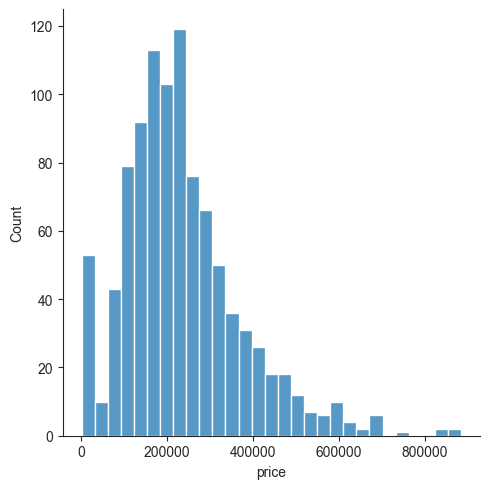

In [7]:
sns.displot(estates, x="price", kde=False)

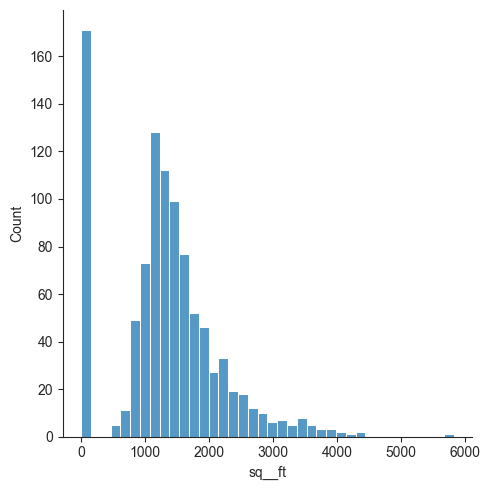

In [8]:
sns.displot(estates, x="sq__ft", kde=False)

# Are the latitudes and longitudes symmetric or skewed?  Would you expect them to be?  (Hint: think about how latitudes and longitudes might relate to neighborhoods)

- latitude makes sense because they're not too far north or south of each other
- longitude shows the property density of a neighborhood



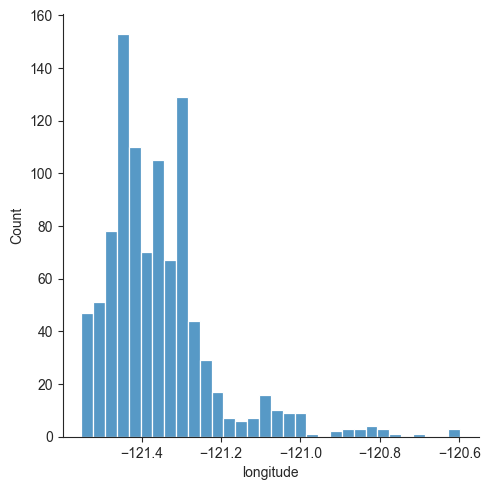

In [9]:
sns.displot(estates, x="longitude", kde=False)

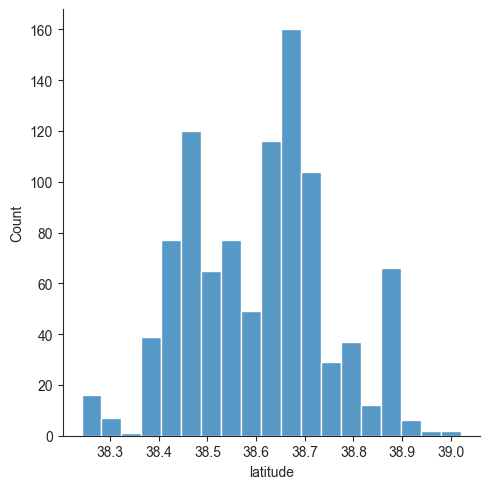

In [10]:
sns.displot(estates, x="latitude", kde=False)

# Are there any numerical variables with inappropriate values (e.g., 0 or -1 for the number of bathrooms)?  What do you think these indicate?
- probably means they don't exist or weren't recorded correctly

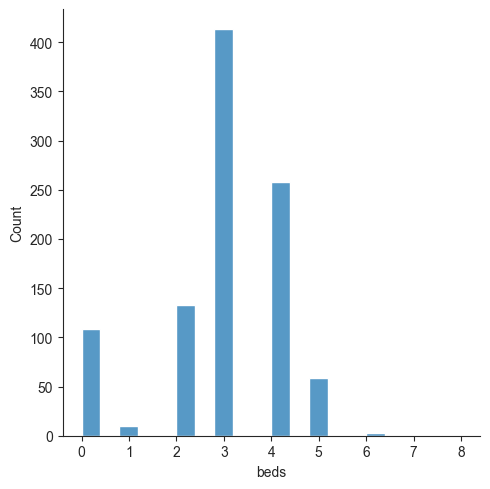

In [11]:
sns.displot(estates, x="beds", kde=False)

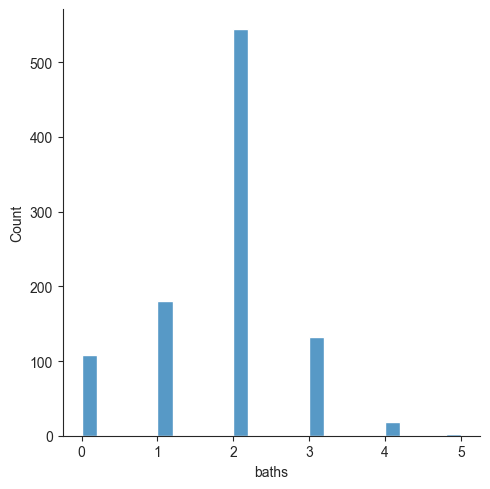

In [12]:
sns.displot(estates, x="baths", kde=False)

# 3

# a. Pandas does not determine which variables are categorical by default.  Strings are left as strings (and called objects in the info() method).  Good categorical variables often have a relatively small number of unique values.  Using the results of the info() method, make a list of all variables that you think could be categorical variables.  

- city
- zip
- state
- beds
- baths
- type

In [13]:
estates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [14]:
print(estates["city"].unique())
print(estates["zip"].unique())
print(estates["state"].unique())
print(estates["type"].unique())
print(estates["sale_date"].unique())


['SACRAMENTO' 'RANCHO CORDOVA' 'RIO LINDA' 'CITRUS HEIGHTS'
 'NORTH HIGHLANDS' 'ANTELOPE' 'ELK GROVE' 'ELVERTA' 'GALT' 'CARMICHAEL'
 'ORANGEVALE' 'FOLSOM' 'MATHER' 'POLLOCK PINES' 'GOLD RIVER'
 'EL DORADO HILLS' 'RANCHO MURIETA' 'WILTON' 'GREENWOOD' 'FAIR OAKS'
 'CAMERON PARK' 'LINCOLN' 'PLACERVILLE' 'MEADOW VISTA' 'ROSEVILLE'
 'ROCKLIN' 'AUBURN' 'LOOMIS' 'EL DORADO' 'PENRYN' 'GRANITE BAY'
 'FORESTHILL' 'DIAMOND SPRINGS' 'SHINGLE SPRINGS' 'COOL' 'WALNUT GROVE'
 'GARDEN VALLEY' 'SLOUGHHOUSE' 'WEST SACRAMENTO']
[95838 95823 95815 95824 95841 95842 95820 95670 95673 95822 95621 95833
 95660 95834 95843 95832 95827 95828 95758 95626 95825 95835 95624 95632
 95826 95608 95662 95630 95829 95655 95757 95742 95726 95818 95762 95831
 95683 95693 95814 95635 95864 95817 95628 95682 95648 95667 95610 95722
 95816 95678 95747 95819 95811 95677 95765 95603 95661 95650 95821 95623
 95663 95746 95631 95619 95614 95690 95633 95691]
['CA']
['Residential' 'Condo' 'Multi-Family' 'Unkown']
['Wed May 21 00

# b. Count the number of unique values for each variable you find in (3a).  Which variables do you think would be good categorical variables?  Convert them to categorical variables.  Run the info() method again to verify that these variables have the Dtype "category" next to them.
- city, state, type

In [15]:
estates["type"] = estates["type"].astype("category")
estates["sale_date"] = estates["sale_date"].astype("category")

In [16]:
estates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    object  
 2   zip        985 non-null    int64   
 3   state      985 non-null    object  
 4   beds       985 non-null    int64   
 5   baths      985 non-null    int64   
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    category
 8   sale_date  985 non-null    category
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 79.4+ KB


# c. Sometimes it can be useful to represent numerical variables as categorical variables.  Count the number of unique values for the zip codes, beds, and baths.  Do you think it is more appropriate to represent these variables as categorical or integer variables?  Why or why not?  Create two new columns (cat_beds, cat_baths) that encode the number of bedrooms and bathrooms as categorical variables.  Run the info() method to verify that these variables not have the Dtype "category" next to them.

- representing beds and baths, yes
- rep zip as categorical feels weird bc there's so many, but zip's are for a unique area so as a cat it'd be better than an int since it's not "counting" something

In [17]:
print(estates["beds"].unique())
print(estates["baths"].unique())

[2 3 1 4 0 5 8 6]
[1 2 3 4 0 5]


In [18]:
estates["cat_beds"]=estates["beds"].astype("category")
estates["cat_baths"]=estates["baths"].astype("category")

In [19]:
estates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    object  
 2   zip        985 non-null    int64   
 3   state      985 non-null    object  
 4   beds       985 non-null    int64   
 5   baths      985 non-null    int64   
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    category
 8   sale_date  985 non-null    category
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
 12  cat_beds   985 non-null    category
 13  cat_baths  985 non-null    category
dtypes: category(4), float64(2), int64(5), object(3)
memory usage: 81.9+ KB


# d. Create a new DataFrame of only the categorical columns.  Run the describe("category") method on this DataFrame.  Based on the number of unique values, do you think the state is a useful variable?  Why or why not?

- all the places are in cali

In [20]:
estates_cat = estates[["type", "sale_date", "cat_beds", "cat_baths"]]

In [21]:
estates_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   type       985 non-null    category
 1   sale_date  985 non-null    category
 2   cat_beds   985 non-null    category
 3   cat_baths  985 non-null    category
dtypes: category(4)
memory usage: 4.9 KB


In [22]:
estates_cat.describe(include=["category"])

,type,sale_date,cat_beds,cat_baths
count,985,985,985,985
unique,4,5,8,6
top,Residential,Mon May 19 00:00:00 EDT 2008,3,2
freq,917,268,413,544


# Plot the types as a bar (count) plot.  Is there anything odd about any of the types?
- there's an 'unknown' type

<AxesSubplot:xlabel='type', ylabel='count'>

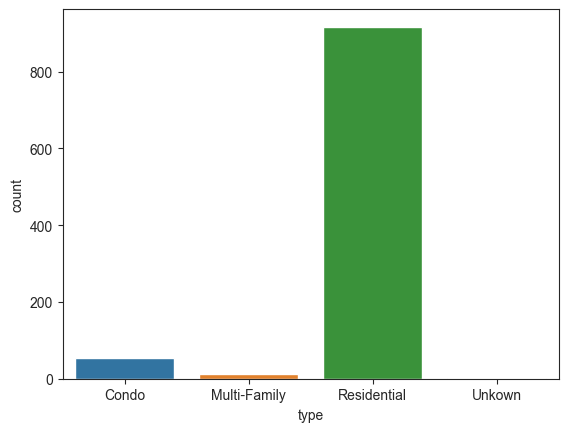

In [23]:
sns.countplot(x = estates_cat["type"], data = estates_cat)

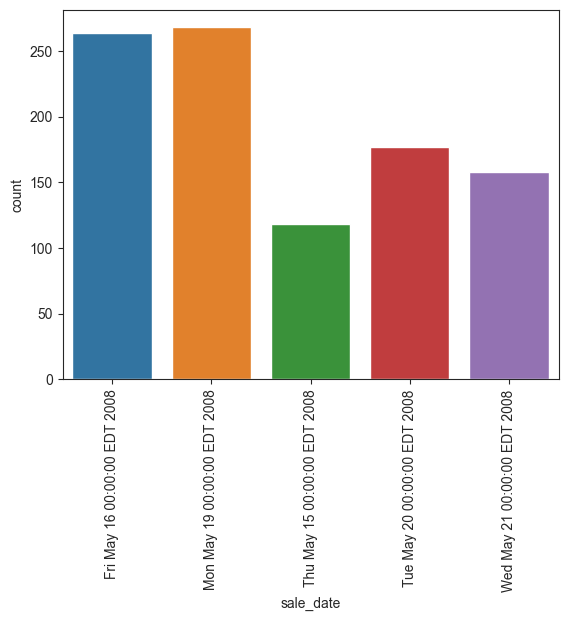

In [24]:
sns.countplot(x = estates_cat["sale_date"], data = estates_cat)
plt.xticks(rotation=90)
plt.show()

# f. Plot the number of beds and baths as bar (count) plots.  Is there anything “odd” about the numbers of beds and baths?  If so, can you hypothesize what these outlier values might mean?

- couple have 0 for beds or baths
- don't exist?

<AxesSubplot:xlabel='cat_beds', ylabel='count'>

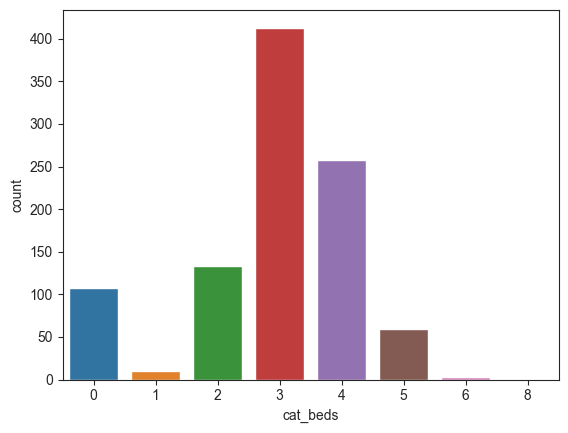

In [25]:
sns.countplot(x = estates_cat["cat_beds"], data = estates_cat)

<AxesSubplot:xlabel='cat_baths', ylabel='count'>

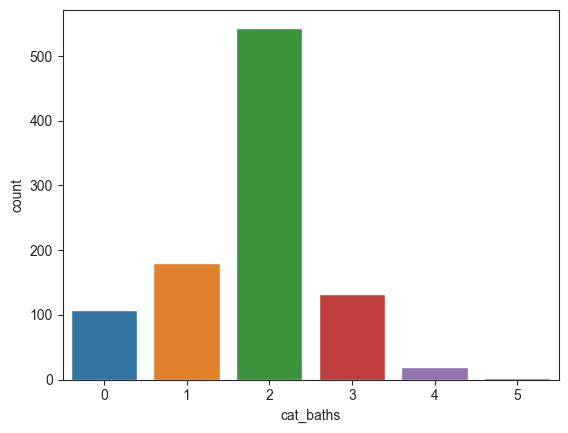

In [26]:
sns.countplot(x = estates_cat["cat_baths"], data = estates_cat)

# g. Plot the zip codes as a bar (count) plot.  Even if the number of unique zip codes is large, why do you think it is better to use a categorical variable for zip code instead of a numerical variable?

In [27]:
estates["cat_zip"] = estates["zip"].astype("category")

In [28]:
estates_cat["zip"] = estates["cat_zip"]

C:\Users\Belladonna Melania\AppData\Local\Temp\ipykernel_19288\1355822158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estates_cat["zip"] = estates["cat_zip"]


In [29]:
estates_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   type       985 non-null    category
 1   sale_date  985 non-null    category
 2   cat_beds   985 non-null    category
 3   cat_baths  985 non-null    category
 4   zip        985 non-null    category
dtypes: category(5)
memory usage: 8.5 KB


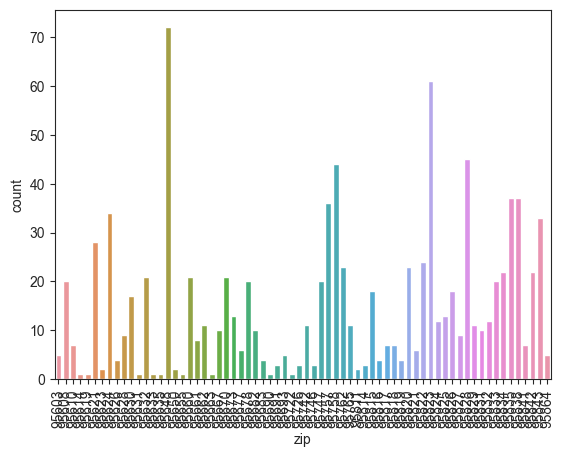

In [30]:
sns.countplot(x = estates_cat["zip"], data = estates_cat)
plt.xticks(rotation=90)
plt.show()

# i. Plot the city as a bar (count) plot.  Which cities have the most properties in the data set?  Which cities have the least?

- most: sacramento 
- least: couple with 1
    - SHINGLE SPRINGS      1
    - GREENWOOD            1
    - FORESTHILL           1
    - MATHER               1
    - SLOUGHHOUSE          1
    - GARDEN VALLEY        1
    - MEADOW VISTA         1
    - COOL                 1
    - WALNUT GROVE         1
    - PENRYN               1
    - DIAMOND SPRINGS      1

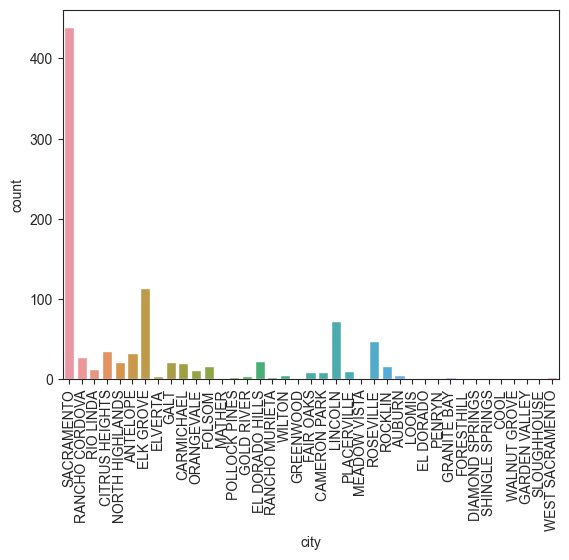

In [31]:
sns.countplot(x = estates["city"], data = estates)
plt.xticks(rotation=90)
plt.show()

In [32]:
estates.groupby("city").size().sort_values()

city
SHINGLE SPRINGS      1
GREENWOOD            1
FORESTHILL           1
MATHER               1
SLOUGHHOUSE          1
GARDEN VALLEY        1
MEADOW VISTA         1
COOL                 1
WALNUT GROVE         1
PENRYN               1
DIAMOND SPRINGS      1
EL DORADO            2
LOOMIS               2
WEST SACRAMENTO      3
POLLOCK PINES        3
RANCHO MURIETA       3
GRANITE BAY          3
GOLD RIVER           4
ELVERTA              4
AUBURN               5
WILTON               5
FAIR OAKS            9
CAMERON PARK         9
PLACERVILLE         10
ORANGEVALE          11
RIO LINDA           13
FOLSOM              17
ROCKLIN             17
CARMICHAEL          20
GALT                21
NORTH HIGHLANDS     21
EL DORADO HILLS     23
RANCHO CORDOVA      28
ANTELOPE            33
CITRUS HEIGHTS      35
ROSEVILLE           48
LINCOLN             72
ELK GROVE          114
SACRAMENTO         439
dtype: int64

# 4 

# Assume that entries with 0 square footage are empty lots.  Encoding these cases with values of 0 lead to two different interpretations of the square footage variable.  This is a good candidate for creating a new Boolean variable.

In [33]:
estates.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,cat_beds,cat_baths,cat_zip
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2,1,95838
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,3,1,95823
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2,1,95815
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2,1,95815
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2,1,95824


In [34]:
estates[estates["sq__ft"] == 0].groupby("sq__ft").size()

sq__ft
0    171
dtype: int64

In [35]:
estates.groupby("city").size()

city
ANTELOPE            33
AUBURN               5
CAMERON PARK         9
CARMICHAEL          20
CITRUS HEIGHTS      35
COOL                 1
DIAMOND SPRINGS      1
EL DORADO            2
EL DORADO HILLS     23
ELK GROVE          114
ELVERTA              4
FAIR OAKS            9
FOLSOM              17
FORESTHILL           1
GALT                21
GARDEN VALLEY        1
GOLD RIVER           4
GRANITE BAY          3
GREENWOOD            1
LINCOLN             72
LOOMIS               2
MATHER               1
MEADOW VISTA         1
NORTH HIGHLANDS     21
ORANGEVALE          11
PENRYN               1
PLACERVILLE         10
POLLOCK PINES        3
RANCHO CORDOVA      28
RANCHO MURIETA       3
RIO LINDA           13
ROCKLIN             17
ROSEVILLE           48
SACRAMENTO         439
SHINGLE SPRINGS      1
SLOUGHHOUSE          1
WALNUT GROVE         1
WEST SACRAMENTO      3
WILTON               5
dtype: int64

In [44]:
estates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   street     985 non-null    object  
 1   city       985 non-null    object  
 2   zip        985 non-null    int64   
 3   state      985 non-null    object  
 4   beds       985 non-null    int64   
 5   baths      985 non-null    int64   
 6   sq__ft     985 non-null    int64   
 7   type       985 non-null    category
 8   sale_date  985 non-null    category
 9   price      985 non-null    int64   
 10  latitude   985 non-null    float64 
 11  longitude  985 non-null    float64 
 12  cat_beds   985 non-null    category
 13  cat_baths  985 non-null    category
 14  cat_zip    985 non-null    category
dtypes: category(5), float64(2), int64(5), object(3)
memory usage: 85.5+ KB
